Author: Riddhima Puri

22/07/2021

Extracting Venot et al. 2020 profiles and creating an atmospheric template for input in PSG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Some styling changes
from pylab import rcParams
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams['figure.titleweight'] = 'bold'
rcParams['figure.titlesize'] = 'xx-large'
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['legend.fontsize'] = 'x-large'

In [2]:
def read_venotetal(fname):

    #Extracting Venot et al data

    data = open(fname, 'r' )
    data=data.read().splitlines()
    
    #Species provided
    species=data[0].split()
    mass=data[1].split()
    
    #Atmospheric Profile
    prof=np.zeros([len(data), len(data[2].split())])
    for i in range(2,len(data)):
        prof[i-2,:]=data[i].split() #Altitude[km], pressure[mbar], mixing ratio of species
    prof[:,1]=prof[:,1]*1e-3 #Pressure [bar]
    return species, mass, prof

In [3]:
#Updated chemical scheme
species1, mass1, prof1 = read_venotetal('HD_209458b/Venot et al Profiles/fractions_molaires_HD209458b_O08.633_C08.390_N07.860Kzz_variable_NewMeth_1d8s_HV.dat')

# fractions_molaires_HD209458b_O08.633_C08.867_N07.860Kzz_variable_NewMeth_1d8s_long.dat = C/O ratio 3 times solar
               

In [4]:
lenprof=len(prof1) #Number of layers
prof=prof1[0:lenprof-2,:]

In [5]:
ind_m = [species1.index('CO2'), species1.index('NH3'), species1.index('HCN'), species1.index('CH4'),
         species1.index('H'), species1.index('N2'), species1.index('CO'), species1.index('H2O'), 
         species1.index('H2')] #Index of main species in HD209458b according to Venot et al.



In [6]:
prof

array([[-3.68800000e+03,  1.00020000e+02,  1.57198205e-29, ...,
         3.53569581e-13,  4.03706241e-13,  6.29865478e-14],
       [-3.55900000e+03,  8.61750000e+01,  1.21664299e-29, ...,
         3.32871210e-13,  3.97480868e-13,  5.55955180e-14],
       [-3.43000000e+03,  7.41440000e+01,  9.16744336e-30, ...,
         3.10610220e-13,  3.85107231e-13,  4.83895835e-14],
       ...,
       [ 1.91470000e+04,  1.04620000e-07,  2.82033553e-49, ...,
         1.34748307e-16,  1.83633157e-23,  2.55562599e-27],
       [ 1.96950000e+04,  9.17570000e-08,  3.30725261e-49, ...,
         3.48383641e-16,  1.16416955e-23,  4.09447168e-27],
       [ 2.00000000e+04,  8.78210000e-08,  3.76731369e-49, ...,
         5.67665564e-16,  9.87202410e-24,  5.39061408e-27]])

In [7]:
species1.index('He')

86

Text(0, 0.5, 'Pressure (bar)')

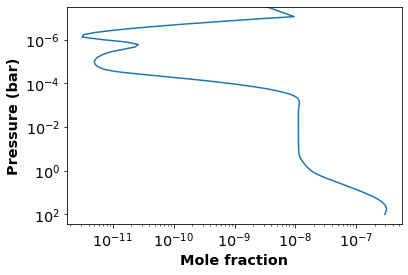

In [8]:
ind=species1.index('CH4')
plt.plot(prof1[:,ind], prof1[:,1])
plt.gca().invert_yaxis()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Mole fraction")
plt.ylabel("Pressure (bar)")

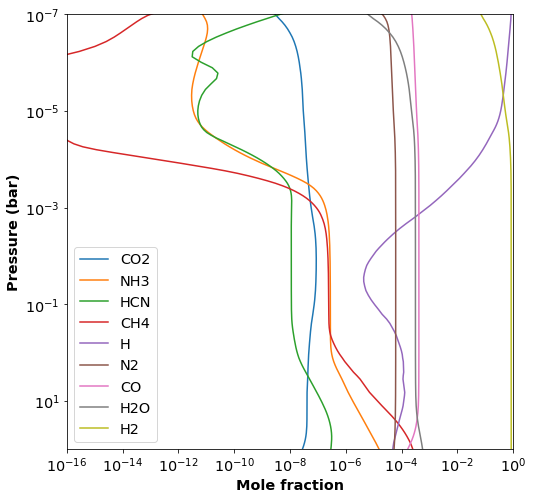

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

for i in range(len(ind_m)):

    ax.plot(prof[:,ind_m[i]+2], prof[:,1], label=species1[ind_m[i]])

plt.gca().invert_yaxis()
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Mole fraction")
plt.ylabel("Pressure (bar)")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.legend(loc='lower left')

#Set x limits
plt.xlim(1e-16, 1e0)
# Set x ticks
# plt.xticks(1e0, 1e-4, 1e-8, 1e-12, 1e-16 )

# Set y limits
plt.ylim(1e2, 1e-7 )
# Set y ticks
# plt.yticks(np.linspace(1e2, 1e-7, 7))

plt.savefig("AbundanceProf.jpg", dpi=150)

plt.show()

In [10]:
prof1[:,1]

array([1.0002e+02, 8.6175e+01, 7.4144e+01, 6.3285e+01, 5.4016e+01,
       4.6103e+01, 3.9302e+01, 3.3504e+01, 2.8561e+01, 2.4292e+01,
       2.0631e+01, 1.7522e+01, 1.4881e+01, 1.2640e+01, 1.0767e+01,
       9.1710e+00, 7.8117e+00, 6.6589e+00, 5.6916e+00, 4.8707e+00,
       4.1643e+00, 3.5473e+00, 3.0086e+00, 2.5453e+00, 2.1518e+00,
       1.8191e+00, 1.5399e+00, 1.2997e+00, 1.0942e+00, 9.1845e-01,
       7.7000e-01, 6.4237e-01, 5.3626e-01, 4.4606e-01, 3.6893e-01,
       3.0356e-01, 2.4889e-01, 2.0180e-01, 1.6146e-01, 1.2936e-01,
       1.0283e-01, 8.1702e-02, 6.5131e-02, 5.2073e-02, 4.2075e-02,
       3.4035e-02, 2.7824e-02, 2.2995e-02, 1.9005e-02, 1.5707e-02,
       1.3247e-02, 1.1209e-02, 9.4849e-03, 8.0127e-03, 6.9077e-03,
       5.9811e-03, 5.1715e-03, 4.5087e-03, 3.9586e-03, 3.4699e-03,
       3.0733e-03, 2.7189e-03, 2.4219e-03, 2.1626e-03, 1.9397e-03,
       1.7438e-03, 1.5636e-03, 1.3980e-03, 1.2515e-03, 1.1226e-03,
       1.0053e-03, 8.9879e-04, 8.0225e-04, 7.1552e-04, 6.3776e

In [11]:
fname='HD_209458b/Venot et al Profiles/profil_HD209458b.dat'
data=open(fname, 'r' )
data=data.read().splitlines()

In [12]:
#Pressure Temp Profile
P=np.zeros(len(data))
T=np.zeros(len(data))

for i in range(len(data)):
    temp=[]
    temp=data[i].split()
    P[i]=float(temp[1])*1e-3 #Pressure in mbar originally
    T[i]=float(temp[2])
    

Text(0, 0.5, 'Pressure (bar)')

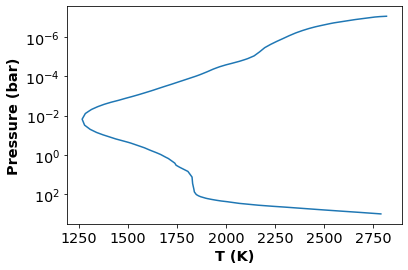

In [13]:
plt.plot(T,P)
plt.gca().invert_yaxis()
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel("Pressure (bar)")

In [14]:
Tnew=np.zeros(len(prof[:,1])) #downsampled T to match the dimensions of abundance profiles
for i in range(len(prof)):
    idx=(np.abs(P-prof[i,1])).argmin()
    Tnew[i]=T[idx]

In [15]:
for i in range(len(P)):
    if P[i]>9.999e4 and P[i]<=1.001e5:
        print(P[i], i)

In [16]:
# fig, ax = plt.subplots(1,1,figsize=(12,6))
# ax.plot(T[4680:28369],P[4680:28369])
# ax.plot(Tnew, prof1[:,1], '.')
# plt.gca().invert_yaxis()
# plt.yscale("log")

Text(0, 0.5, 'Pressure (bar)')

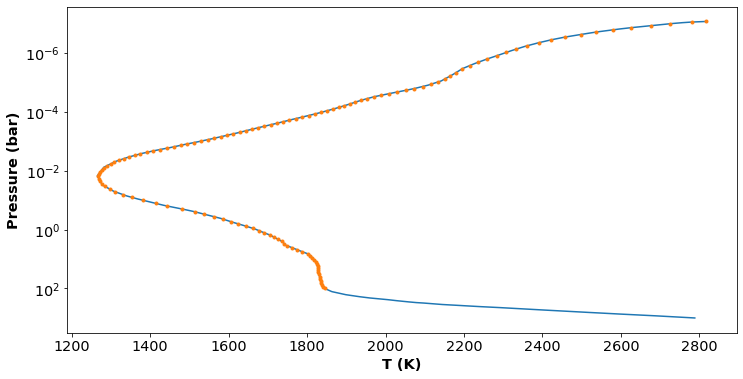

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(T,P)
ax.plot(Tnew, prof[:,1], '.')
plt.gca().invert_yaxis()
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel("Pressure (bar)")

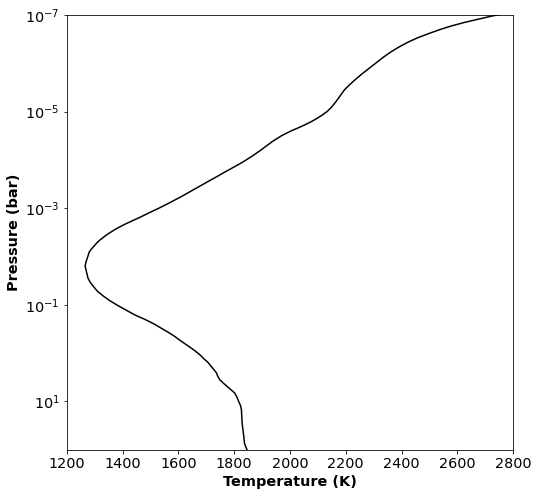

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

plt.plot(Tnew,prof[:,1], 'k')
plt.gca().invert_yaxis()
plt.yscale("log")

plt.ylabel("Pressure (bar)")
plt.xlabel("Temperature (K)")

plt.xlim(1200, 2800)
plt.ylim(1e2, 1e-7 )
# Set y ticks
# plt.yticks(np.linspace(1e2, 1e-7, 7))

plt.savefig("ThermalProf.jpg", dpi=150)

plt.show()




In [19]:
fname='HD_209458b/Parmentier/C_O Sensitivity Tests/psg_cfg_Na__Li_1ppm_TiO_1ppb.txt'
data = open(fname, 'r' )
data=data.read().splitlines()

In [20]:
data

['<OBJECT>Exoplanet',
 '<OBJECT-NAME>HD209458b',
 '<OBJECT-DATE>2018/09/21 12:33',
 '<OBJECT-DIAMETER>192954',
 '<OBJECT-GRAVITY>1.49000',
 '<OBJECT-GRAVITY-UNIT>rho',
 '<OBJECT-STAR-DISTANCE>0.0475',
 '<OBJECT-STAR-VELOCITY>0.08484',
 '<OBJECT-SOLAR-LONGITUDE>0.0',
 '<OBJECT-SOLAR-LATITUDE>0.00',
 '<OBJECT-SEASON>180.00',
 '<OBJECT-STAR-TYPE>G',
 '<OBJECT-STAR-TEMPERATURE>6091.0',
 '<OBJECT-STAR-RADIUS>1.162',
 '<OBJECT-OBS-LONGITUDE>-180.00',
 '<OBJECT-OBS-LATITUDE>3.29',
 '<OBJECT-OBS-VELOCITY>-14.900',
 '<OBJECT-PERIOD>3.525',
 '<OBJECT-STAR-METALLICITY>0.010',
 '<OBJECT-PERIAPSIS>0.00',
 '<OBJECT-ECCENTRICITY>0.00000',
 '<OBJECT-INCLINATION>86.71',
 '<GEOMETRY>Observatory',
 '<GEOMETRY-OFFSET-NS>0.0',
 '<GEOMETRY-OFFSET-EW>0.0',
 '<GEOMETRY-OFFSET-UNIT>arcsec',
 '<GEOMETRY-OBS-ALTITUDE>48.3700',
 '<GEOMETRY-ALTITUDE-UNIT>pc',
 '<GEOMETRY-USER-PARAM>0.0',
 '<GEOMETRY-STELLAR-TYPE>G',
 '<GEOMETRY-STELLAR-TEMPERATURE>5777',
 '<GEOMETRY-STELLAR-MAGNITUDE>0',
 '<GEOMETRY-SOLAR-ANGLE>89

In [21]:
dataobj = [x for x in data if '<OBJECT' in x]
dataobj='\n'.join(dataobj)
datageo = [x for x in data if '<GEOMETRY-' in x]
datageo='\n'.join(datageo)
datagen = [x for x in data if '<GENERATOR-' in x]
datagen='\n'.join(datagen)
datasurf = [x for x in data if '<SURFACE-' in x]
datasurf='\n'.join(datasurf)

In [22]:
dataobj

'<OBJECT>Exoplanet\n<OBJECT-NAME>HD209458b\n<OBJECT-DATE>2018/09/21 12:33\n<OBJECT-DIAMETER>192954\n<OBJECT-GRAVITY>1.49000\n<OBJECT-GRAVITY-UNIT>rho\n<OBJECT-STAR-DISTANCE>0.0475\n<OBJECT-STAR-VELOCITY>0.08484\n<OBJECT-SOLAR-LONGITUDE>0.0\n<OBJECT-SOLAR-LATITUDE>0.00\n<OBJECT-SEASON>180.00\n<OBJECT-STAR-TYPE>G\n<OBJECT-STAR-TEMPERATURE>6091.0\n<OBJECT-STAR-RADIUS>1.162\n<OBJECT-OBS-LONGITUDE>-180.00\n<OBJECT-OBS-LATITUDE>3.29\n<OBJECT-OBS-VELOCITY>-14.900\n<OBJECT-PERIOD>3.525\n<OBJECT-STAR-METALLICITY>0.010\n<OBJECT-PERIAPSIS>0.00\n<OBJECT-ECCENTRICITY>0.00000\n<OBJECT-INCLINATION>86.71\n<OBJECT-ORBIT>'

In [23]:
datanew=[]

datanew=dataobj+'\n'+datageo+'\n'

In [24]:
#Only Olivia profile
#Add Li, TiO, Na, K to PSG directly - assumption - uniformly mixed?
#detection in the upper layer more important for transits

#show different scenarios
#choose the one closest to the observations

#State of art for chemical 

In [25]:
[x for x in data if 'MOL' in x]

['<ATMOSPHERE-LAYERS-MOLECULES>Li,H2,He,CO,H,N2,CH4,SiO,Na,H2O,HCN,H2S,MgH,C2H2,K,NH3,HCl,TiO,SH,SiH,PH3,C2H4,HF,VO,CO2,H2CO,COS,OH,N,NO,O,C,SO2,O2,NO2']

In [26]:
[x for x in data if '<ATMOSPHERE' in x]

['<ATMOSPHERE-NGAS>10',
 '<ATMOSPHERE-GAS>H2,He,CO,H2O,CH4,CO2,O2,Na,Li,TiO',
 '<ATMOSPHERE-TYPE>XUV[H2],KZ[02],EXO[CO],EXO[H2O],EXO[CH4],EXO[CO2],EXO[O2],EXO[Na],KZ[03],EXO[TiO]',
 '<ATMOSPHERE-ABUN>0,210,0,1,1,1,1,1,1,0.01',
 '<ATMOSPHERE-UNIT>scl,scl,scl,scl,scl,scl,scl,scl,scl,scl',
 '<ATMOSPHERE-TAU>0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07',
 '<ATMOSPHERE-NAERO>0',
 '<ATMOSPHERE-NMAX>0',
 '<ATMOSPHERE-LMAX>0',
 '<ATMOSPHERE-AEROS>',
 '<ATMOSPHERE-ATYPE>',
 '<ATMOSPHERE-AABUN>',
 '<ATMOSPHERE-AUNIT>',
 '<ATMOSPHERE-ASIZE>',
 '<ATMOSPHERE-ASUNI>',
 '<ATMOSPHERE-DESCRIPTION>Parmentier+2014; Kempton_solar_1.0_CtoO_gas',
 '<ATMOSPHERE-STRUCTURE>Equilibrium',
 '<ATMOSPHERE-WEIGHT>2.36',
 '<ATMOSPHERE-PRESSURE>1.0000',
 '<ATMOSPHERE-PUNIT>bar',
 '<ATMOSPHERE-LAYERS-MOLECULES>Li,H2,He,CO,H,N2,CH4,SiO,Na,H2O,HCN,H2S,MgH,C2H2,K,NH3,HCl,TiO,SH,SiH,PH3,C2H4,HF,VO,CO2,H2CO,COS,OH,N,NO,O,C,SO2,O2,NO2',
 '<ATMOSPHERE-LAYERS>50',
 '<ATMOSPHERE-LAYER-1>1.0000e+03,2.0419e+03,1E-6,8.3638e-0

In [27]:
datanew+='<ATMOSPHERE-DESCRIPTION>Venot et al; Updated Chemical Scheme \n'+'<ATMOSPHERE-STRUCTURE>Equilibrium \n'
datanew+='<ATMOSPHERE-WEIGHT>2.27 \n'+'<ATMOSPHERE-PRESSURE>1.0000 \n'+'<ATMOSPHERE-PUNIT>bar \n'
datanew+='<ATMOSPHERE-NGAS>'+str(len(ind_m))

datanew+='\n<ATMOSPHERE-GAS>'+species1[ind_m[0]]
for i in range(1,len(ind_m)):
    datanew+=','+species1[ind_m[i]]

datanew+='\n<ATMOSPHERE-ABUN>1'    
for i in range(1,len(ind_m)):
    datanew+=',1'
    
datanew+='\n<ATMOSPHERE-UNIT>scl'
for i in range(1,len(ind_m)):
    datanew+=',scl'
    
datanew+='\n<ATMOSPHERE-LAYERS-MOLECULES>'+species1[ind_m[0]]    
for i in range(1,len(ind_m)):
    datanew+=','+species1[ind_m[i]]
    
datanew+='\n<ATMOSPHERE-LAYERS>'+str(len(prof1))
for i in range(len(prof1)):
    datanew+='\n<ATMOSPHERE-LAYER-'+str(i+1)+'>'+str(prof1[i,1])+','+str(Tnew[i]) #P (bar), T (K), abundances (mole fraction)
    for j in range(len(ind_m)):
        datanew+=','+str(prof1[i,ind_m[j]+2])
        
datanew+='\n<ATMOSPHERE-CONTINUUM>Rayleigh,Refraction,CIA_all,UV_all'

datanew+='\n'+datagen+'\n'+datasurf


IndexError: index 129 is out of bounds for axis 0 with size 129

In [28]:
ind_m

[76, 80, 79, 81, 85, 82, 83, 84, 87]

In [29]:
print(datanew)

<OBJECT>Exoplanet
<OBJECT-NAME>HD209458b
<OBJECT-DATE>2018/09/21 12:33
<OBJECT-DIAMETER>192954
<OBJECT-GRAVITY>1.49000
<OBJECT-GRAVITY-UNIT>rho
<OBJECT-STAR-DISTANCE>0.0475
<OBJECT-STAR-VELOCITY>0.08484
<OBJECT-SOLAR-LONGITUDE>0.0
<OBJECT-SOLAR-LATITUDE>0.00
<OBJECT-SEASON>180.00
<OBJECT-STAR-TYPE>G
<OBJECT-STAR-TEMPERATURE>6091.0
<OBJECT-STAR-RADIUS>1.162
<OBJECT-OBS-LONGITUDE>-180.00
<OBJECT-OBS-LATITUDE>3.29
<OBJECT-OBS-VELOCITY>-14.900
<OBJECT-PERIOD>3.525
<OBJECT-STAR-METALLICITY>0.010
<OBJECT-PERIAPSIS>0.00
<OBJECT-ECCENTRICITY>0.00000
<OBJECT-INCLINATION>86.71
<OBJECT-ORBIT>
<GEOMETRY-OFFSET-NS>0.0
<GEOMETRY-OFFSET-EW>0.0
<GEOMETRY-OFFSET-UNIT>arcsec
<GEOMETRY-OBS-ALTITUDE>48.3700
<GEOMETRY-ALTITUDE-UNIT>pc
<GEOMETRY-USER-PARAM>0.0
<GEOMETRY-STELLAR-TYPE>G
<GEOMETRY-STELLAR-TEMPERATURE>5777
<GEOMETRY-STELLAR-MAGNITUDE>0
<GEOMETRY-SOLAR-ANGLE>89.999
<GEOMETRY-OBS-ANGLE>48.121
<GEOMETRY-PLANET-FRACTION>1.000e+00
<GEOMETRY-STAR-DISTANCE>0.000000e+00
<GEOMETRY-STAR-FRACTION>1.423340

In [30]:
prof1[129,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
file = open('AtmTemplate_Venot_UpdatedChem.txt', 'w')
file.write(datanew)
file.close()

In [33]:
fname='AtmTemplate_Venot_UpdatedChem.txt'
data2 = open(fname, 'r' )
data2=data2.read().splitlines()

In [34]:
data2

['<OBJECT>Exoplanet',
 '<OBJECT-NAME>HD209458b',
 '<OBJECT-DATE>2018/09/21 12:33',
 '<OBJECT-DIAMETER>192954',
 '<OBJECT-GRAVITY>1.49000',
 '<OBJECT-GRAVITY-UNIT>rho',
 '<OBJECT-STAR-DISTANCE>0.0475',
 '<OBJECT-STAR-VELOCITY>0.08484',
 '<OBJECT-SOLAR-LONGITUDE>0.0',
 '<OBJECT-SOLAR-LATITUDE>0.00',
 '<OBJECT-SEASON>180.00',
 '<OBJECT-STAR-TYPE>G',
 '<OBJECT-STAR-TEMPERATURE>6091.0',
 '<OBJECT-STAR-RADIUS>1.162',
 '<OBJECT-OBS-LONGITUDE>-180.00',
 '<OBJECT-OBS-LATITUDE>3.29',
 '<OBJECT-OBS-VELOCITY>-14.900',
 '<OBJECT-PERIOD>3.525',
 '<OBJECT-STAR-METALLICITY>0.010',
 '<OBJECT-PERIAPSIS>0.00',
 '<OBJECT-ECCENTRICITY>0.00000',
 '<OBJECT-INCLINATION>86.71',
 '<OBJECT-ORBIT>',
 '<GEOMETRY-OFFSET-NS>0.0',
 '<GEOMETRY-OFFSET-EW>0.0',
 '<GEOMETRY-OFFSET-UNIT>arcsec',
 '<GEOMETRY-OBS-ALTITUDE>48.3700',
 '<GEOMETRY-ALTITUDE-UNIT>pc',
 '<GEOMETRY-USER-PARAM>0.0',
 '<GEOMETRY-STELLAR-TYPE>G',
 '<GEOMETRY-STELLAR-TEMPERATURE>5777',
 '<GEOMETRY-STELLAR-MAGNITUDE>0',
 '<GEOMETRY-SOLAR-ANGLE>89.999',


Upload with Config file/ use only specific molecules

In [35]:
for i in range(len(data)):
    if '<ATMOSPHERE-LAYERS-MOLECULES>' in data[i]:
        molc_ind=i

In [36]:
molc='<ATMOSPHERE-LAYERS-MOLECULES>'
for i in range(len(species1)):
    molc=molc+','+species[i]
    
lay='<ATMOSPHERE-LAYERS>'+len(prof)

NameError: name 'species' is not defined

In [ ]:
#Line with molecule
molc=[x for x in data if '<ATMOSPHERE-LAYERS-MOLECULES>' in x]
molc=molc[0].split('>')[1].split(',')

In [ ]:
for i in range(len(sv)):
        ECEF_PG.append([x for x in data if 'PG'+sv in x])

In [ ]:
#Number of atmospheric layers
ln=[x for x in data if '<ATMOSPHERE-LAYERS>' in x]
ln=int(ln[0].split('>')[1])

In [ ]:
def read_configfile(fname):
    data = open(fname, 'r' )
    data=data.read().splitlines()